##  Final Project: Module 1
- Student name: Michael Moravetz
- Instructor: Brandon Lewis
- Student Pace: Fulltime Online DS Bootcamp

## Predicting  Houses Prices in King County, Washington
### Overview
- The King County Housing Dataset is a collection of data regarding houses sold in King County Washington. Seattle is in King County. It is located on the Puget Sound. I will start by importing the data. Next I will clean it and explore it.  I will determine which features I want to keep for a linear gression model used for predicting house prices in King county. And, finally I will determine which, if any factors can help determine sale prices for houses in King County.

- The dataset contains over 21000 entries with 21 columns.  I will use the OSEMiN approach to anylize it. OSEMiN is an accromyn for Obtain, Scrub, Explore, Model and Interpret.  The first step, Obtain, is pretty straight forward. The dataset is available to the public and there will be no additional data brought in from outside the King County Housing Dataset. The scrub phase will consist of ensuring the features are properly encoded as the right type and any null values have been adequately dealt with.  I will drop from the dataset, any columns I will not be using in this analysis.  If necesary, I will categorize columns to fit the needs of this analysis and make new columns to help accurately model and interpret the data. In the Explore step, I will visualize and different features and determine which features can aid in answering different questions that pertain to the goal of determing house prices in King County. I will investigate correlation between different features and the target vairable, price. I will determine which features have multicolinearity and choose which features to use and which not to use, as not having multicolinearity between predictors is an assumption of linear regression modeling.  After dealing with multicolinearity and properly encoding variables as either categorical or numerical, continuous data I will use sklearn.model_selection and statsmodels so recursively choose variables to use in the model.  I will keep interpretability a priority here, as to obtain results that can have useful, realworld implications to help prospective sellers and buyers of houses.  After deciding on features, I will make different models and compare results, finally deciding which model is most desirable. Interpretting the model will be an important step in deciding which model to choose and after chosen, I will analyze chosen model and make recomendations for 'clients'. 

#### Import necesary libraries and the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
plt.style.use('dark_backm')
%matplotlib inline

df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [2]:
# overview of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


#### Visualize Prices with longitutde and latitude

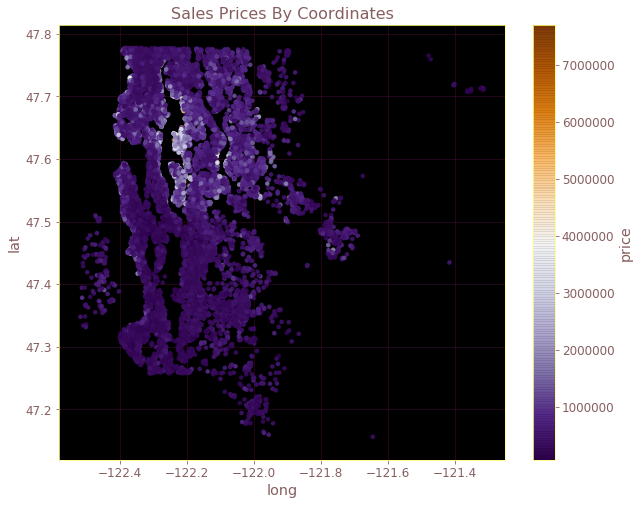

In [3]:
plt.style.use('dark_backm')
df.plot.scatter(x='long', y='lat',
        figsize=(10,8), alpha=.9,c='price', lw=.1,
        cmap='PuOr_r', sharex=False)
plt.title('Sales Prices By Coordinates')
plt.show()

Looking at this scatter plot it can be visualized that the higher sale pricces of houses are generally concentrated in key areas. In fact, the highest concentration of white area on the map, represents the west side of Lake Washington. The towns of Bellevue and Medina are located there, where Bill Gates owns a large house. As they say, location is everything. I will look into using zipcodes as a predictor because of this, but also other factors that might aid current home owners in increasing the value of their house if it is not already located in a prime real estate location.

## Scrub 
- Prepare data for analisys
- Determine categorical data, dealing with datatypes and null values.

In [4]:
# Starting with null values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Waterfront, view and yr_renovated features all have null values.  I will explore them individuially and properly encode them to be used as either categorical or continuouos features.  If need be, I will subset the columns into different groups that might give more useful information for modeling and interpretting.

#### Waterfront

In [5]:
# looking into waterfront first
print('type:',df.waterfront.dtype, '\n' 'unique values:' '\n',
df.waterfront.value_counts(dropna=False))

type: float64 
unique values:
  0.0    19075
NaN      2376
 1.0      146
Name: waterfront, dtype: int64


This looks like all 1's, 0's  or NaN's (null values) are in this column and it should be a categorical feature. I will set it to a string and on hot encode it when I have determined all features that will be categorical.

In [6]:
df.waterfront = df.waterfront.astype('str')

#### yr_renovated
- I will what to do with the null values, what type of variable it should be.

In [7]:
print('type:',df.yr_renovated.dtype, '\n' 'unique values:' '\n',
df.yr_renovated.unique(),'\n' 'value_counts:', df.yr_renovated.sort_values().sum())

type: float64 
unique values:
 [   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.] 
value_counts: 1484971.0


It looks like this feature will be best dealt with as a categorical feature as well, I will turn its type into integers, NaN's into 0 and put it in bins of either renovated or not.

In [8]:
df.yr_renovated.fillna(value=0, inplace=True)

Im going to say that a renovation happening 40 years ago is probably not the same as a renovation within the last twenty years. As such I will do three bins for this. Bins will be never_renovated, renovated before 1995 and renovated post 1995.

In [9]:
# create bins and devide yr_renovate into three categories and create labels,
#  pd.cut will convert to categorical type.
bins = [-1, 0, 1995, 2016]
labels = ['never_ren', 'pre_95_ren', 'post_95_ren']
df['yr_ren'] = pd.cut(df.yr_renovated, bins=bins, labels=labels)
df.yr_ren.describe()

count         21597
unique            3
top       never_ren
freq          20853
Name: yr_ren, dtype: object

#### view
- I will into the null values in the 'view' column and take the same approach with it as the above two columns to determine how it should be handled.

In [10]:
print('type:',df.view.dtype, '\n' 'unique values:' '\n',
df.view.unique(),'\n' 'value_counts:', df.view.sort_values().sum())

type: float64 
unique values:
 [ 0. nan  3.  4.  2.  1.] 
value_counts: 5036.0


This feature represents the number of times a house has been viewed, It is impossible to view something part of a time, So it should be made an int instead of a float.  Ill deal with NaNs by changing them to 0.

In [11]:
# convert Nan's to 0 inplace, encode as int64
df.view.fillna(value=0, inplace=True)
df.view = df.view.astype('int64')

In [12]:
df.view.describe()

count    21597.000000
mean         0.233181
std          0.764673
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

#### zipcode
- Next I am going to look at zipcodes and do the same procedure as above for determing how to use this feature.

In [13]:
# Check type, how many unique values and check min and max counts per zipcodes
print('type:',df.zipcode.dtype, '\n' 'unique values:' '\n',
df.zipcode.unique(),'\n' 'value_counts min and max:' '\n',
      df.zipcode.value_counts().min(),df.zipcode.value_counts().max())

type: int64 
unique values:
 [98178 98125 98028 98136 98074 98053 98003 98198 98146 98038 98007 98115
 98107 98126 98019 98103 98002 98133 98040 98092 98030 98119 98112 98052
 98027 98117 98058 98001 98056 98166 98023 98070 98148 98105 98042 98008
 98059 98122 98144 98004 98005 98034 98075 98116 98010 98118 98199 98032
 98045 98102 98077 98108 98168 98177 98065 98029 98006 98109 98022 98033
 98155 98024 98011 98031 98106 98072 98188 98014 98055 98039] 
value_counts min and max:
 50 602


This is a lot of zipcodes and they definiely shouldnt be considered a continuous numerical feature.  I am debating whether to bin them in to groups, or simply convert them to strings and make them categorical.  It will be a lot of of categories but, I think putting zipcodes lumped together in bins, will not make this feature as good of a predictor, I will therefore make them strings and categorize them.

In [14]:
# concerting to 'str' type. before modeling, I will create dummies.
# pd. get_dummies will create dummy columns for anything object or categorical
df.zipcode = df.zipcode.astype('str')

#### grade
- I am going to look at grade now and determine if it should be categorical or numerical. 

In [15]:
print('type:',df.grade.dtype, '\n' 'unique values:' '\n',
df.grade.unique(),'\n' 'value_counts min and max:' '\n',
      df.grade.value_counts().min(),df.grade.value_counts().max())

type: int64 
unique values:
 [ 7  6  8 11  9  5 10 12  4  3 13] 
value_counts min and max:
 1 8974


In [16]:
df.grade.describe()

count    21597.000000
mean         7.657915
std          1.173200
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

It looks like this is am ordinal categorical variable. I will confirm this during EDA.  For now, it  will be best dealt with by making it an object and one hot encoding it with the others before modeling using pd.get_dummies.

In [17]:
df.grade = df.grade.astype('str')

#### condition
- Check values and determin type of feature

In [18]:
print('type:',df.condition.dtype, '\n' 'unique values:' '\n',
    df.condition.unique(),'\n' 'value_counts min and max:' '\n',
    df.condition.value_counts().min(),df.condition.value_counts().max())

type: int64 
unique values:
 [3 5 4 1 2] 
value_counts min and max:
 29 14020


This looks similar to 'grade', as such I will handle it the same. Change its type to a str and onehot encode with the others.

In [19]:
df.condition = df.condition.astype('str')

#### sqft_basement
- Determine if this should be an object type as it is currently and deal with missing or null values.

In [20]:
print('type:',df.sqft_basement.dtype, '\n' 'value_counts:' '\n',
      df.sqft_basement.value_counts().head())

type: object 
value_counts:
 0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64


Suspicions were correct, this should be an 'Int64'  like the rest of them. There are 454 '?' in this that must be dealt with, I will convert them to 0's and properly encode them. Then I will do one last check of the whole dataframe for null or missing values.

In [21]:
df.loc[df['sqft_basement'] =='?', 'sqft_basement'] = 0
df.sqft_basement = df.sqft_basement.astype('float').astype('int64')
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
yr_ren           0
dtype: int64

#### date
- I will look into the 'date' column and determine if it is something I may be able to use.

In [22]:
print(type(df.date))
df.date.head()

<class 'pandas.core.series.Series'>


0    10/13/2014
1     12/9/2014
2     2/25/2015
3     12/9/2014
4     2/18/2015
Name: date, dtype: object

I am going to encode this as a date time object and see if we can find anything valuable regarding the time of year a house is sold. I will then break it down into months, adding a new column.

In [23]:
df.date = pd.to_datetime(df.date)
df['month'] = df.date.dt.month
df['month'] = df.month.astype('str')
df.month.head()

0    10
1    12
2     2
3    12
4     2
Name: month, dtype: object

#### Current list of categorical  feature:
- zipcode, grade, yr_ren, condition, waterfront, month

### Drop unecesary columns
- At this point, I want to get rid of some columns that I am not interested in. They are id. lat, long, and the old yr_renovated category 

In [24]:
# Drop unwanted columns and inspect dataframe for correct types 
drop = ['lat', 'long', 'yr_renovated']
df.drop(drop, inplace=True, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null object
view             21597 non-null int64
condition        21597 non-null object
grade            21597 non-null object
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
zipcode          21597 non-null object
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
yr_ren           21597 non-null category
month            21597 non-null object
dtypes: category(1), datetime64[ns](1), float64(3), int64(10), object(5)
memory usage: 3.2+ MB


## EDA
- Exploratory Data Analysis
- Investigate and visualize data

#### Check For Multicollinearity
- First, look at correlation between predictors and target.
_ Second, compare predictors against eachother to find multicolinearity.
- Third, Remove highly correlated feature because an assumption of the liner regression model is no high correlation between predictor vairables.

In [25]:
# Check correlation with price and continuous variables.
df.corr().price.sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.393497
sqft_basement    0.321108
bedrooms         0.308787
floors           0.256804
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
id              -0.016772
Name: price, dtype: float64

There are a few highly correlated variables here sqft_lving having the highest correlatioiin with price. I will now compare against each other to determin which features need to be removed.

In [26]:
preds = df.drop('price', axis=1)

In [27]:
preds.corr()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
id,1.000000,0.001150,0.005162,-0.012241,-0.131911,0.018608,0.011772,-0.010799,-0.004359,0.021617,-0.002701,-0.138557
bedrooms,0.001150,1.000000,0.514508,0.578212,0.032471,0.177944,0.078354,0.479386,0.297229,0.155670,0.393406,0.030690
bathrooms,0.005162,0.514508,1.000000,0.755758,0.088373,0.502582,0.186016,0.686668,0.278485,0.507173,0.569884,0.088303
sqft_living,-0.012241,0.578212,0.755758,1.000000,0.173453,0.353953,0.281715,0.876448,0.428660,0.318152,0.756402,0.184342
sqft_lot,-0.131911,0.032471,0.088373,0.173453,1.000000,-0.004814,0.075054,0.184139,0.015031,0.052946,0.144763,0.718204
floors,0.018608,0.177944,0.502582,0.353953,-0.004814,1.000000,0.028414,0.523989,-0.241866,0.489193,0.280102,-0.010722
view,0.011772,0.078354,0.186016,0.281715,0.075054,0.028414,1.000000,0.166017,0.270629,-0.054452,0.278928,0.073083
sqft_above,-0.010799,0.479386,0.686668,0.876448,0.184139,0.523989,0.166017,1.000000,-0.051175,0.424037,0.731767,0.195077
sqft_basement,-0.004359,0.297229,0.278485,0.428660,0.015031,-0.241866,0.270629,-0.051175,1.000000,-0.130085,0.199288,0.015885
yr_built,0.021617,0.155670,0.507173,0.318152,0.052946,0.489193,-0.054452,0.424037,-0.130085,1.000000,0.326377,0.070777


I will use .70 as the cut off point to determine if features are highly correlated, and visualize it with a heatmap.

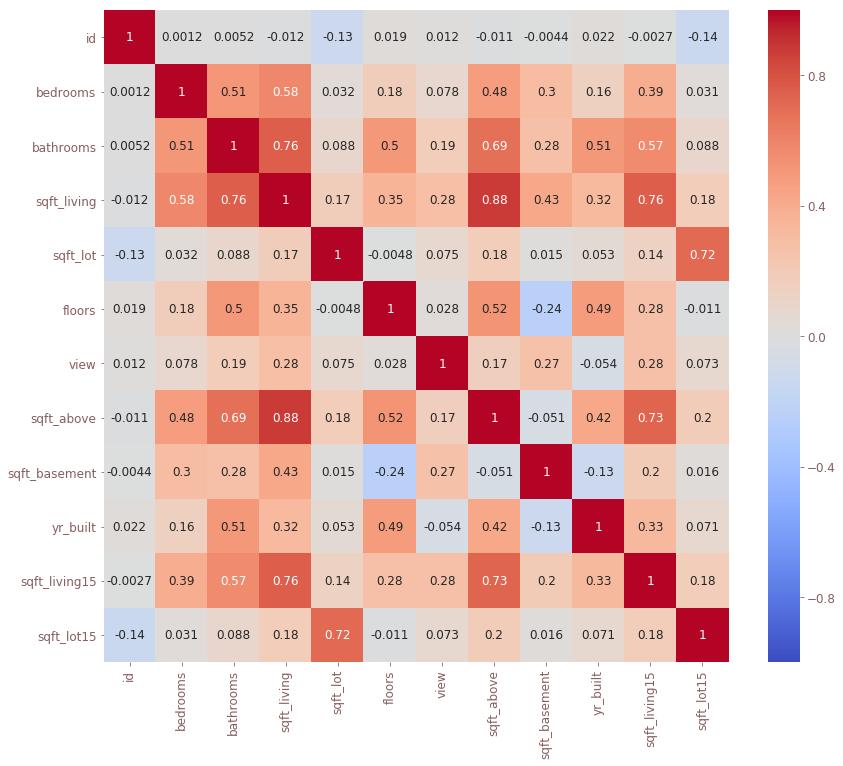

In [28]:
fig = plt.figure(figsize=(14, 12))
mask = np.zeros_like(preds.corr(), dtype=np.bool)
# mask[np.triu_indices_from(mask)] = False
sns.heatmap(preds.corr(),  annot=True, linewidths=0, vmin=-1, cmap='coolwarm')
plt.show()

#### Drop features with high multicolinearity

Sqft-living is highly correlated with bathrooms, sqft_above, and sqft_living15. Sqft_lot and sq_ft_lot15, also show correlation above my set threshold. According to my research, sqft_living15 is the squarefoot living space of the 15 closest neighbors. I am going to assume that the lving space of the actual house itself is more important and drop all others besides sqft_living, and sqft_lot

In [29]:
df.drop(['sqft_living15', 'sqft_above', 'bathrooms', 'sqft_lot15'], inplace=True, axis=1)

#### Visualize correlation between continuous predictors and target variable('price).

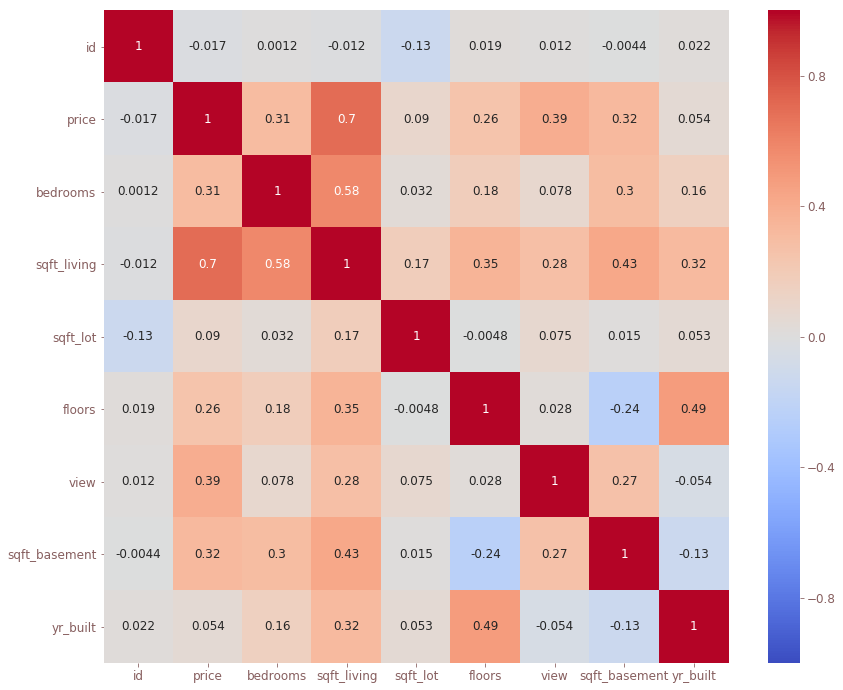

In [30]:
fig = plt.figure(figsize=(14, 12))
mask = np.zeros_like(df.corr(), dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(),  annot=True, mask=mask, linewidths=0, vmin=-1, cmap='coolwarm')
plt.show()

#### Summary of proccess at this point

So far, I have looked at all of the variables and determind if they are the approriate type .  I decided which variables would be numerical and which variables would be categorical.  I found vairables of muylticolinearity and decided which would be dropped. I dropped chosen features. Next I will explore and visualize the data. I will ask questions and see I can find ansers given the dataset. finally I will onehot encode the predictors and prepare for modelling. 

### Visualize and investigate questions

I will start by visualizing the data, checking for normality and checking for linearity. I will determind if the data needs to be normalized or scaled.  I will ask questions and visualize the data regarding those questions.

#### Linearity
- Use pariplots to check linearity amongst numerical features again price.

/Users/michaelmoravetz/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


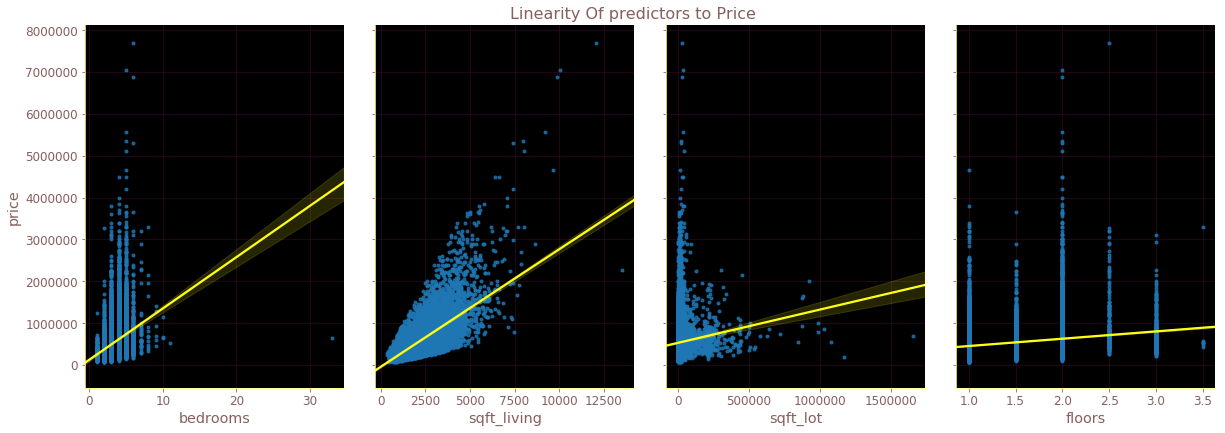

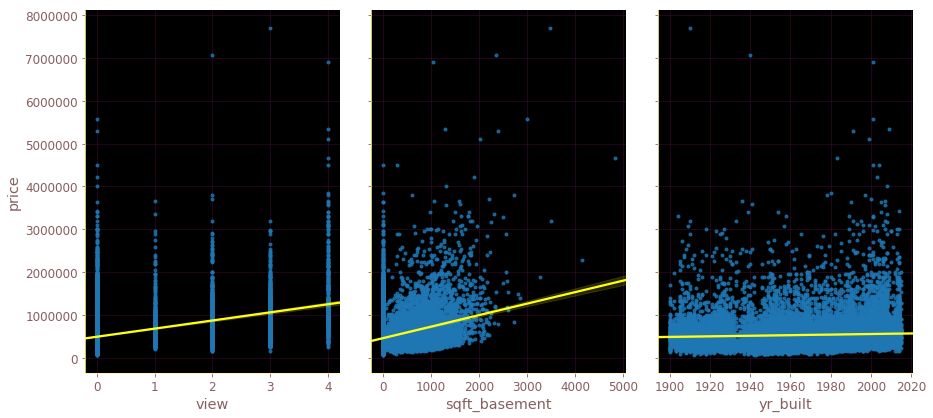

In [31]:
sns.pairplot(x_vars=['bedrooms','sqft_living', 'sqft_lot','floors'],
             y_vars='price', 
             data=df, 
             kind='reg',
             markers='.',
             plot_kws={'line_kws':{'color': 'xkcd:yellow'}},
             height=6, aspect=0.7)
plt.suptitle('Linearity Of predictors to Price',size=16, y=1)
sns.pairplot(x_vars=['view', 'sqft_basement', 'yr_built'],
             y_vars='price', 
             data=df, 
             kind='reg',
             markers='.',
             plot_kws={'line_kws':{'color':'xkcd:yellow'}},
             height=6, aspect=0.7)

plt.show()

All continous features except for yr_built show positive linearity with 'price'. This makes them good potential predictors and will be used in modeling.  I will drop yr_built as it has a low correlation of .054 with price and no positive or negative linearity.

#### Check Normality of Distributions
- Histograms and KDEs to see how each feature is distributed.
- Normality is not an assumption of a linear regression model. However, after fitting models, if there are poor test scores, normalizing or scaling features might be a necesary step.  In which case knowing how they are distributed will be useful.

/Users/michaelmoravetz/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


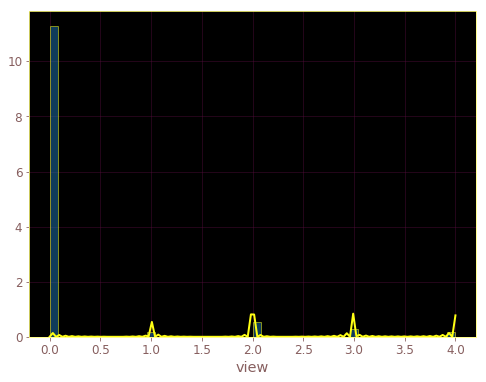

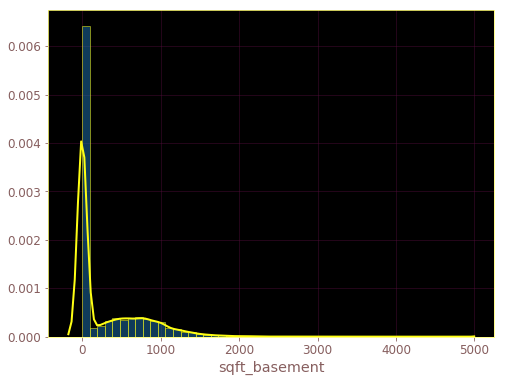

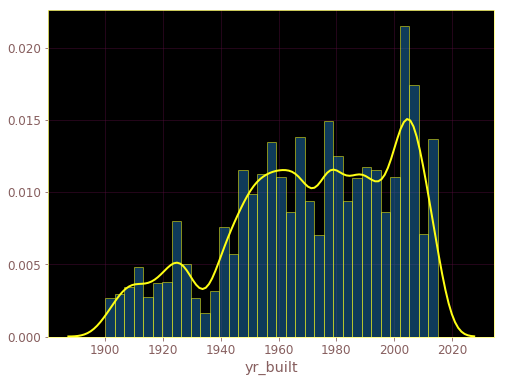

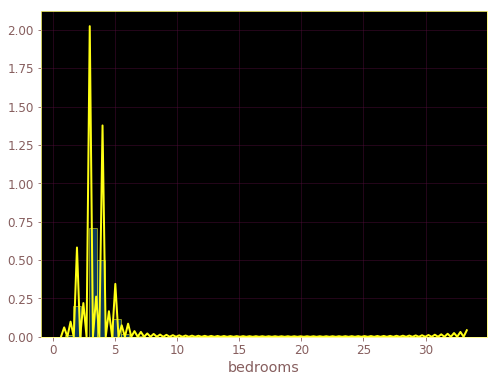

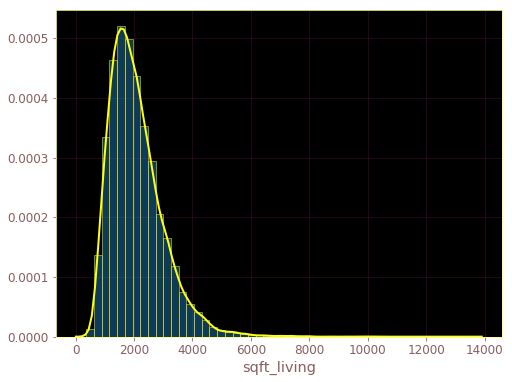

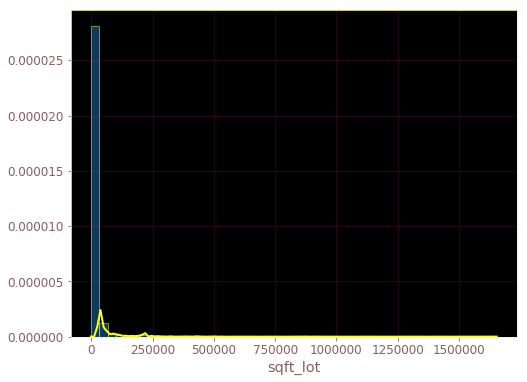

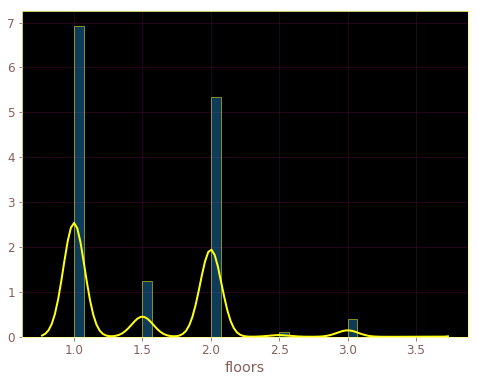

In [32]:
to_plot = ['view', 'sqft_basement', 'yr_built',
           'bedrooms','sqft_living', 'sqft_lot','floors']
for col in to_plot:
    plt.figure(figsize=(8,6))
    sns.distplot(df[col],hist_kws={'alpha':.5},
                 kde_kws={'color':'xkcd:yellow',
                          'linewidth':2})
    plt.show()

####  Visualize categorical data 
- I will start by looking into how the time of year will effect sales price on a month by month basis.

In [33]:
# check how many sales are in each month
df.month = df.month.astype('int64')
df_month = df.groupby('month')['id'].nunique()
df_month

month
1      978
2     1247
3     1875
4     2229
5     2414
6     2178
7     2211
8     1939
9     1771
10    1876
11    1409
12    1470
Name: id, dtype: int64

#### Month
- Does the month have an effect on the number of houses sold?
- Does the month have an effect on the price a house is sold for?
-Number of Sales per Month

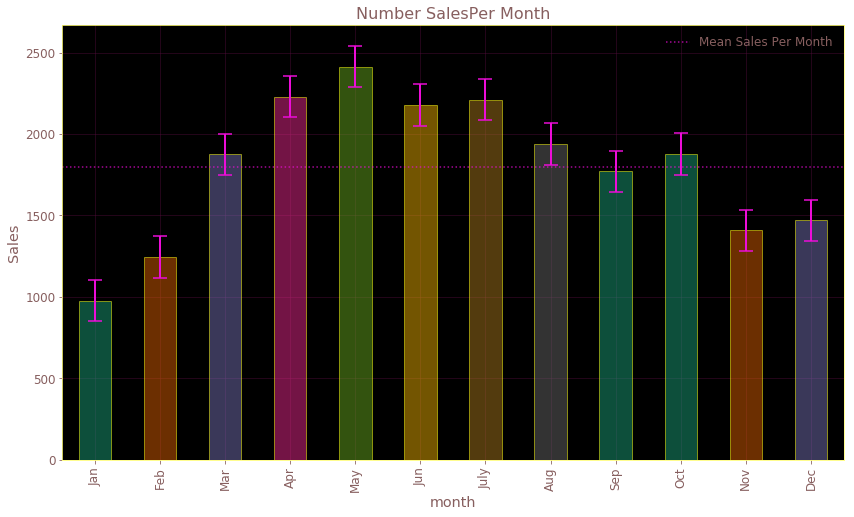

In [34]:
# create labels for proper visualization
month_dict ={1:'Jan',2:'Feb',3: 'Mar',
             4: 'Apr',5: 'May',6: 'Jun',
             7: 'July',8: 'Aug',9: 'Sep',
             10: 'Oct',11: 'Nov',12: 'Dec'
            }
x_ticks = [month_dict[k] for k,v in month_dict.items()]
sns.set_palette('Dark2')
fig, ax = plt.subplots(figsize=(14,8))
ax = df_month.plot(kind='bar', alpha=.5, 
                   label='_',
                   yerr=df_month.sem(),
                   error_kw={'ecolor':'xkcd:fuchsia',
                             'lw':2,
                             'capsize':7,
                             'capthick':1.5}
                  )

ax.set(title='Number SalesPer Month',
       xticklabels=x_ticks, ylabel='Sales')
plt.axhline(y=df_month.mean(),
            color='xkcd:fuchsia', 
            ls=':', alpha=.7, 
            label='Mean Sales Per Month')
ax.legend()
plt.show()


 Median Sale Price per Month

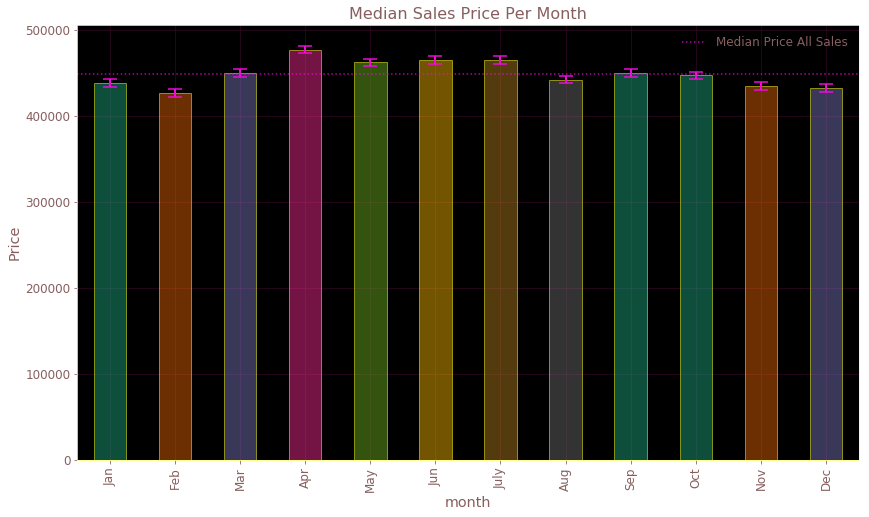

In [35]:
df_date = df.groupby('month')['price'].median()
fig, ax = plt.subplots(figsize=(14,8))
ax = df_date.plot(kind='bar', alpha=.5, 
                   label='_',
                   yerr=df_date.sem(),
                   error_kw={'ecolor':'xkcd:fuchsia',
                             'lw':2,
                             'capsize':7,
                             'capthick':1.5}
                  )

ax.set(title='Median Sales Price Per Month',
       xticklabels=x_ticks, ylabel='Price')
plt.axhline(y=df_date.median(),
            color='xkcd:fuchsia', 
            ls=':', alpha=.7, 
            label='Median Price All Sales')
ax.legend()
plt.show()

# df_month.distplot(figsize=(14,8), lw='1')

#### Grade
- How does grade effect the sale of a house?
- Does the grade of a house effect the price of a house?
- Do renovated houses of different grades determin the sale price of a house?

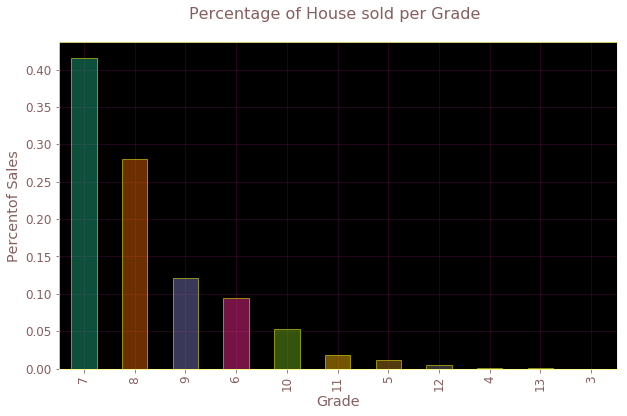

In [36]:

ax = df.grade.value_counts(normalize=True).plot(kind='bar',figsize=(10,6), alpha=.5)
plt.title('Percentage of House sold per Grade \n')
ax.set(xlabel= 'Grade', ylabel='Percentof Sales')
plt.show()

Here we can see, there is clearly a relationship with grade and percentage of sales most houses sold are in the mid range. This is probably due to there being fewer of high grade and low grade house. I will visualize the relationship between grade and price.

Text(0.5, 1.0, 'Price per Grade')

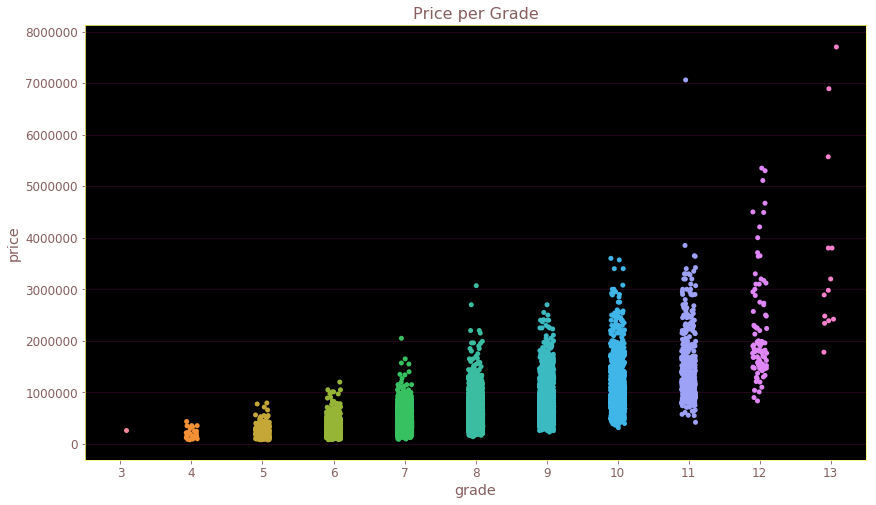

In [37]:
df_num = df
df_num.grade = df_num.grade.astype('int64')
plt.figure(figsize=(14,8))
sns.stripplot('grade', 'price', data=df_num,dodge=True)
plt.title('Price per Grade')
plt.show()

Here we can see a definite linear relationship between price and grade. The higher the grade the higher the price. This looks to be a strong predictor.  Now, I will look further into this to see how renovations relate to grade and price.

Text(0.5, 1.0, 'Price per Grade and Renovation Status')

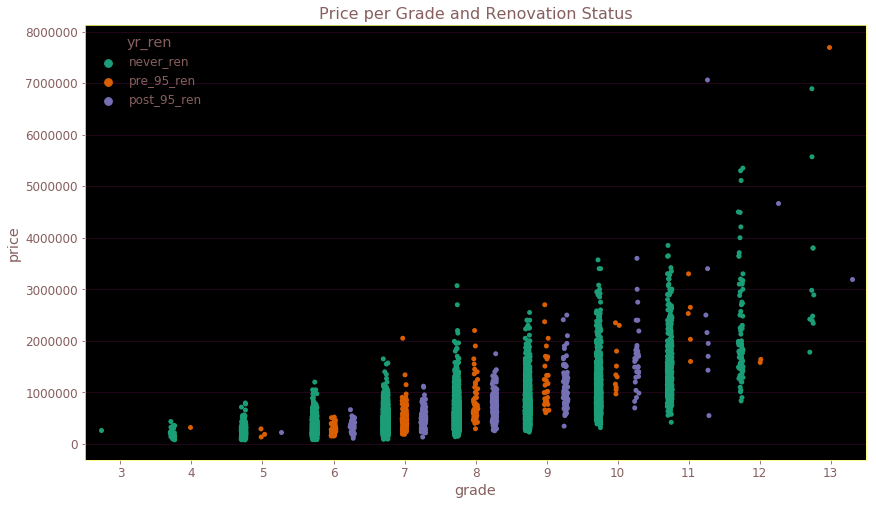

In [38]:
df_num = df
df_num.grade = df_num.grade.astype('int64')
plt.figure(figsize=(14,8))
sns.stripplot('grade', 'price', data=df_num, hue='yr_ren',dodge=True)
plt.title('Price per Grade and Renovation Status')
plt.show()

We can see the same trend here. however, many of the higher grade houses have never had renovations. Maybe they are newer houses. this needs fiurther investigation.  Many mid grade houses have had renovations either recently or in the past.  Grade 7 is the most sold grade of house and contains the highest percentage of renovated houses.  It could be that without those renovations, they woiuld have been lower grades.

#### View
- Does the number of time a house has been viewed have an effect on the sale price of houses?
- Do renovated houses get viewed more?

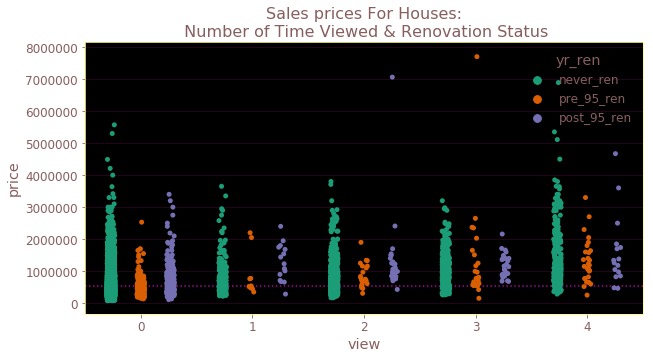

In [39]:
fig, ax = plt.subplots(figsize=(10,5))
# plt.figure(figsize=(14, 7))
ax = sns.stripplot('view', 'price', data=df,hue='yr_ren',  dodge=True, jitter=True)
ax.axhline(y=df.price.mean(),
            color='xkcd:fuchsia', 
            ls=':', alpha=.7, 
            label='Median Price All Sales')
ax.set_title('Sales prices For Houses:\n Number of Time Viewed & Renovation Status')
plt.show()

There appears to be a linear relationship between how many of times a house has been viewed, and the sales price.  The acception being, the majority of houses that were not viewed, but were renovated recently sold more often and acheived a comparable price to houses viewed multiple times. Further investigation into this question is needed to determine why.  Houses veiwed 4 times, got higher prices, possibly because they were of a higher grade or were larger and more expensive compared to less viewed houses.  An analysis of grade and views will tell us more.

####  views per grade and price

Text(0.5, 1.0, 'Price per Grade and Number of times Viewed')

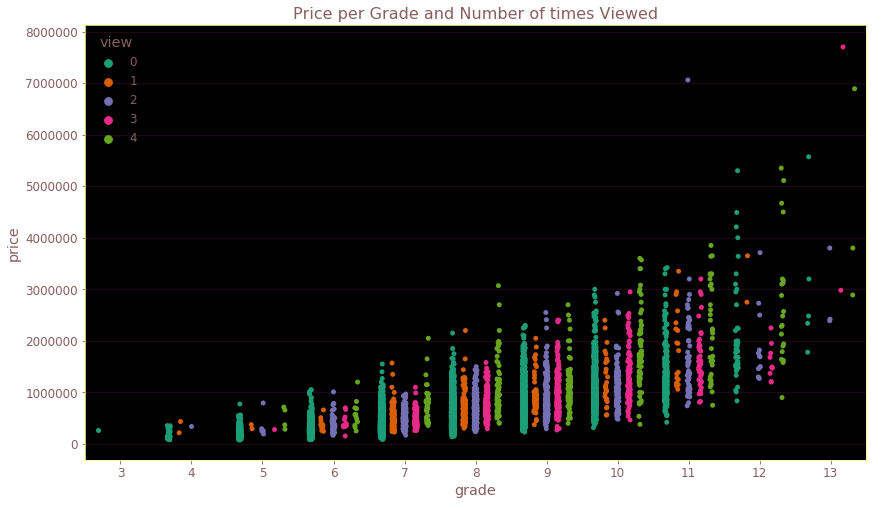

In [40]:
df_num = df
df_num.grade = df_num.grade.astype('int64')
plt.figure(figsize=(14,8))
sns.stripplot('grade', 'price', data=df_num, hue='view',dodge=True)
plt.title('Price per Grade and Number of times Viewed')
plt.show()

Here we can see that as the grade goes up, the houses which are viewed more often, sell for higher prices. Where as on the low grade houses, houses viewed zero times get the hiughest price on average.

## Modeling

#### Final feature preparations
- assure linearity, check correlation
- drop columns with little correlation
- onehot encode categorical variables using pd.get_dummies, I will set it to drop the first column of each dummy feature and it willchange all category and object type to dummies.

In [41]:
df.grade = df.grade.astype('str')
df.month = df.month.astype('str')
df.drop(['id', 'date'], inplace=True, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null object
view             21597 non-null int64
condition        21597 non-null object
grade            21597 non-null object
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
zipcode          21597 non-null object
yr_ren           21597 non-null category
month            21597 non-null object
dtypes: category(1), float64(2), int64(6), object(5)
memory usage: 2.2+ MB


####  Create a correlation matrix and get rid of values that are not correlated

In [42]:
cor_mat = df.corr()

pd.DataFrame(cor_mat['price'].sort_values(ascending=False))

,price
price,1.000000
sqft_living,0.701917
view,0.393497
sqft_basement,0.321108
bedrooms,0.308787
floors,0.256804
sqft_lot,0.089876
yr_built,0.053953


As discussed earlier, yr_built doesnt show much potential for this model. It would have been best used to possibly engineer features regarding grade, renovation and views to create a feature that could better predict prices.  However, for our purposes, it is not going to work and will be dropped now.  sqft_lot also shows low correlation and will be dropped now.

In [43]:
# Good by to these two features with low correlation
df.drop(['sqft_lot','yr_built'], inplace=True, axis=1)

#### One hot encode categorical columns
- use pd.get_dummies to create dummy columns for all non continuous features to feed model.

In [44]:
df_dum = pd.get_dummies(df, drop_first=True)

In [45]:
df_dum.head()

,price,bedrooms,sqft_living,floors,view,sqft_basement,waterfront_1.0,waterfront_nan,condition_2,condition_3,...,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
0,221900.0,3,1180,1.0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2570,2.0,0,400,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,180000.0,2,770,1.0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,1960,1.0,0,910,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,510000.0,3,1680,1.0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


Final cleaned dataframe with all columns properly encoded as categorical or continous. It is perpared for feature selection


In [46]:
df_dum.columns.values

array(['price', 'bedrooms', 'sqft_living', 'floors', 'view',
       'sqft_basement', 'waterfront_1.0', 'waterfront_nan', 'condition_2',
       'condition_3', 'condition_4', 'condition_5', 'grade_11',
       'grade_12', 'grade_13', 'grade_3', 'grade_4', 'grade_5', 'grade_6',
       'grade_7', 'grade_8', 'grade_9', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipcode_9

#### Feature Selection
- now that the assumptioins for the model have been met (linearity, no multicolinearity, and categorical features have been onehot encoded), we are ready to fit the model. While our data is not normally distributed, I am going forward with the fit.  Normality is not an assumption for this type of model.  If it seems a bad fit, I will reapproach and normalize data, get rid of outliers. However, for feature selection, I will scale data to properly evaluate coefficients on an equal playing field.

- Before deciding on the model, I will use sklearn's RFECV to recursively select features and determine the best number of features to use with cross validation.
- must scale data first to get accurate coefficient.
- I will then compare results to a stepwise feature selection using statsmodels and determine the features I will use in my final model.

### Feature selection with Sklearn
- recursive feature selction

In [47]:
# Subset target and preictors
Y = df_dum['price']
X = df_dum.drop('price', axis=1)

In [48]:
# Scale predictors for fair comparison
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)
Xs = scaled

/Users/michaelmoravetz/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [49]:
# instantiate Recursive feature selector and LinearRegression class object
linreg = LinearRegression()
selector = RFECV(linreg)

In [50]:
# fit model to evaluate feature importance
selector = selector.fit(Xs, Y)

/Users/michaelmoravetz/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [51]:
# view feature importance 
selector.ranking_

array([ 1,  1, 27,  1,  7,  1, 60, 19, 18, 17, 16,  1,  1,  1, 15,  1,  1,
        1,  1,  1,  1, 54, 45,  1,  1,  1,  1,  1, 31,  9, 21, 23, 44, 29,
        2,  3, 11,  1, 48, 42, 57,  1,  1, 36,  1,  1, 53, 22,  1,  1, 35,
       25, 38, 26, 24, 43,  4,  1,  1, 10, 30,  1,  1,  1, 14,  1, 13,  1,
        1,  1,  1,  1,  6,  1,  1,  1,  1,  5,  1,  1, 20, 28,  8, 32, 33,
        1, 40, 39, 59,  1, 41, 12, 47, 49, 52, 55, 37, 34, 56, 58, 50, 51,
       46])

In [52]:
# view how many feature were chosen
selector.n_features_

44

In [53]:
# create df for inspecting chosen columns and print a list of chosen columns
feature_selection = pd.DataFrame({'columns': X.columns,
                                 'ranking': selector.ranking_})
features = feature_selection.set_index('ranking')
features = features.sort_index(axis=0, ascending=True)
chosen = features[:44]
chosen = chosen['columns'].unique()
chosen

array(['bedrooms', 'zipcode_98144', 'zipcode_98107', 'zipcode_98029',
       'zipcode_98126', 'zipcode_98125', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98122', 'zipcode_98039', 'zipcode_98040', 'zipcode_98119',
       'zipcode_98052', 'zipcode_98053', 'zipcode_98117', 'zipcode_98116',
       'zipcode_98115', 'zipcode_98112', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98109', 'zipcode_98102', 'zipcode_98103', 'zipcode_98105',
       'zipcode_98008', 'zipcode_98007', 'zipcode_98136', 'zipcode_98005',
       'sqft_living', 'view', 'waterfront_1.0', 'zipcode_98199',
       'grade_11', 'grade_12', 'zipcode_98006', 'grade_4', 'grade_5',
       'grade_6', 'grade_7', 'grade_8', 'grade_13', 'zipcode_98177',
       'zipcode_98004', 'grade_9'], dtype=object)

In [54]:
# checking R -squared value for chosen features
linreg.fit(X[X.columns[selector.support_]],Y)
linreg.score(X[X.columns[selector.support_]],Y)

0.8114980504480092

#### Chosen features 
- sklearn's features

In [55]:
model1= df_dum[chosen]

In [56]:
# fit model and view chosen features with coefficients
X = scaler.fit_transform(model1)
linreg.fit(X, Y)
print('Estimated y-intercept:', linreg.intercept_)
print('Estimated R²:', linreg.score(X, Y))
pd.DataFrame(list(zip(model1.columns, linreg.coef_)))

Estimated y-intercept: 329308.5619025073
Estimated R²: 0.8114980504480092


/Users/michaelmoravetz/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,0,1
0,bedrooms,-3.727988e+05
1,zipcode_98144,2.047976e+05
2,zipcode_98107,2.720433e+05
3,zipcode_98029,1.473104e+05
4,zipcode_98126,1.141767e+05
5,zipcode_98125,1.299243e+05
6,zipcode_98033,2.970834e+05
7,zipcode_98034,1.325528e+05
8,zipcode_98122,2.787096e+05
9,zipcode_98039,1.184052e+06


### Select Features With StatsModels

In [57]:
# subset target and predictors
X = df_dum.drop('price', axis=1)
Y = df_dum['price']

In [58]:
# View summary report
X = sm.add_constant(X)
stats_model = sm.OLS(Y, X).fit()
preds = stats_model.predict(X)
stats_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     1049.
Date:                Sat, 20 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:22:37   Log-Likelihood:            -2.8799e+05
No. Observations:               21597   AIC:                         5.762e+05
Df Residuals:                   21493   BIC:                         5.770e+05
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.205e+05    3.1e+04      3.881      0.000    5.96e+04    1.81e+05
bedrooms           -1.072e+04   1436.373     -7.466      0.000   -1.35e+04   -7908.592
sqft_living          182.0754      2.532     71.915      0.000     177.113     187.038
floors             -2.554e+04   2655.786     -9.615      0.000   -3.07e+04   -2.03e+04
view                5.582e+04   1596.429     34.967      0.000    5.27e+04     5.9e+04
sqft_basement        -48.9187      3.332    -14.683      0.000     -55.449     -42.389
waterfront_1.0      6.657e+05   1.38e+04     48.399      0.000    6.39e+05    6.93e+05
waterfront_nan        18.6480   3270.398      0.006      0.995   -6391.576    6428.872
condition_2         7.758e+04   3.03e+04      2.560      0.010    1.82e+04    1.37e+05
condition_3         8.347e+04   2.82e+04      2.961      0.003    2.82e+04    1.39e+05
condition_4         1.118e+05   2.82e+04      3.961      0.000    5.65e+04    1.67e+05
condition_5         1.622e+05   2.84e+04      5.716      0.000    1.07e+05    2.18e+05
grade_11            2.005e+05   8970.006     22.351      0.000    1.83e+05    2.18e+05
grade_12            6.187e+05   1.72e+04     36.065      0.000    5.85e+05    6.52e+05
grade_13            1.718e+06   4.29e+04     40.046      0.000    1.63e+06     1.8e+06
grade_3            -7.969e+04   1.51e+05     -0.529      0.597   -3.75e+05    2.16e+05
grade_4            -1.856e+05      3e+04     -6.192      0.000   -2.44e+05   -1.27e+05
grade_5            -2.243e+05   1.21e+04    -18.497      0.000   -2.48e+05   -2.01e+05
grade_6            -2.306e+05   7625.823    -30.233      0.000   -2.45e+05   -2.16e+05
grade_7            -2.259e+05   6381.321    -35.402      0.000   -2.38e+05   -2.13e+05
grade_8            -1.998e+05   5768.616    -34.643      0.000   -2.11e+05   -1.89e+05
grade_9            -1.252e+05   5585.724    -22.423      0.000   -1.36e+05   -1.14e+05
zipcode_98002       3596.9907   1.33e+04      0.271      0.787   -2.25e+04    2.97e+04
zipcode_98003      -5597.9845    1.2e+04     -0.468      0.640   -2.91e+04    1.79e+04
zipcode_98004       7.688e+05   1.17e+04     65.746      0.000    7.46e+05    7.92e+05
zipcode_98005       3.145e+05   1.41e+04     22.240      0.000    2.87e+05    3.42e+05
zipcode_98006         2.5e+05   1.06e+04     23.668      0.000    2.29e+05    2.71e+05
zipcode_98007       2.544e+05    1.5e+04     17.017      0.000    2.25e+05    2.84e+05
zipcode_98008       2.626e+05    1.2e+04     21.935      0.000    2.39e+05    2.86e+05
zipcode_98010       6.132e+04    1.7e+04      3.608      0.000     2.8e+04    9.46e+04
zipcode_98011       1.425e+05   1.34e+04     10.671      0.000    1.16e+05    1.69e+05
zipcode_98014       1.028e+05   1.57e+04      6.558      0.000     7.2e+04    1.33e+05
zipcode_98019       1.024e+05   1.35e+

###### def stepwise_selection

In [59]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
#     included = []
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

#### Stepwise selection 

In [60]:
y = df_dum.price
x = df_dum.drop('price', axis=1)

model2 = stepwise_selection(x, y)
model2

Add  grade_11                       with p-value 0.0
Add  zipcode_98004                  with p-value 0.0
Add  waterfront_1.0                 with p-value 0.0
Add  grade_12                       with p-value 0.0
Add  grade_13                       with p-value 0.0
Add  grade_9                        with p-value 0.0
Add  bedrooms                       with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  zipcode_98112                  with p-value 3.21665e-248
Add  zipcode_98039                  with p-value 1.34713e-247
Add  view                           with p-value 9.23201e-260
Add  zipcode_98040                  with p-value 1.53035e-198
Add  zipcode_98105                  with p-value 1.2542e-134
Add  zipcode_98033                  with p-value 4.37032e-111
Add  zipcode_98119                  with p-value 3.71489e-116
Add  zipcode_98103                  with p-value 3.8554e-121
Add  zipcode_98115                  with p-value 2.89115e-120
Add  zipcode_98199  

/Users/michaelmoravetz/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:44: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


Add  zipcode_98055                  with p-value 0.00110795
Add  zipcode_98010                  with p-value 0.000715873
Add  zipcode_98058                  with p-value 0.000715362
Add  zipcode_98148                  with p-value 0.002344


['grade_11',
 'zipcode_98004',
 'waterfront_1.0',
 'grade_12',
 'grade_13',
 'grade_9',
 'bedrooms',
 'sqft_living',
 'zipcode_98112',
 'zipcode_98039',
 'view',
 'zipcode_98040',
 'zipcode_98105',
 'zipcode_98033',
 'zipcode_98119',
 'zipcode_98103',
 'zipcode_98115',
 'zipcode_98199',
 'zipcode_98117',
 'zipcode_98109',
 'zipcode_98122',
 'zipcode_98102',
 'zipcode_98107',
 'zipcode_98023',
 'zipcode_98006',
 'zipcode_98116',
 'zipcode_98052',
 'zipcode_98144',
 'zipcode_98005',
 'zipcode_98008',
 'zipcode_98092',
 'sqft_basement',
 'condition_5',
 'zipcode_98136',
 'zipcode_98034',
 'zipcode_98029',
 'zipcode_98007',
 'zipcode_98074',
 'zipcode_98075',
 'zipcode_98053',
 'zipcode_98177',
 'zipcode_98125',
 'yr_ren_post_95_ren',
 'zipcode_98027',
 'zipcode_98126',
 'zipcode_98133',
 'zipcode_98118',
 'zipcode_98072',
 'zipcode_98155',
 'month_4',
 'floors',
 'grade_7',
 'grade_8',
 'grade_6',
 'grade_5',
 'condition_4',
 'zipcode_98028',
 'zipcode_98106',
 'zipcode_98011',
 'month_3'

In [61]:
diff_between_models = [i for i in model2 if i not in chosen]
print('Features chosen by stats models, not chosen by sklearn', diff_between_models)

Features chosen by stats models, not chosen by sklearn ['zipcode_98023', 'zipcode_98092', 'sqft_basement', 'condition_5', 'yr_ren_post_95_ren', 'zipcode_98027', 'zipcode_98133', 'zipcode_98118', 'zipcode_98072', 'zipcode_98155', 'month_4', 'floors', 'condition_4', 'zipcode_98028', 'zipcode_98106', 'zipcode_98011', 'month_3', 'zipcode_98077', 'zipcode_98108', 'zipcode_98024', 'zipcode_98146', 'zipcode_98056', 'zipcode_98065', 'zipcode_98059', 'zipcode_98045', 'zipcode_98019', 'zipcode_98014', 'zipcode_98166', 'zipcode_98168', 'zipcode_98038', 'zipcode_98055', 'zipcode_98010', 'zipcode_98058', 'zipcode_98148']


## Train/Test Split
- I will do two train/test splits on the following two models:
 - model_1: Features chosen from the recursive features method using sklearn linearRegression and RFECV, contains 44 features
 - model_2: Features chosen with stepwise selecetion using statsmodel, contains 78 features. This model contains all of the 44 from model_1 plus 34 more.

#### Model 1

In [62]:
# Declare models to be tested
model_1 = model1
model_2 = df_dum[model2]
y = df_dum.price
X = model_1

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [64]:
# Inspect for shap and length
print(len(X_train), len(X_test), len(y_train), len(y_test))

17277 4320 17277 4320


In [65]:
model = LinearRegression()
model.fit(X_train, y_train)

y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

In [66]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('Estimated R²:',
      model.score(X_train,y_train), '\n')

print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

rmse_train = np.sqrt(train_mse)
rmse_test = np.sqrt(test_mse)

print("\nRMSE Train Set:", rmse_train)
print("RMSE Test Set:", rmse_test)
print('\nStandard Deviation of Target Variable, price:', df.price.std())

Estimated R²: 0.8121703055605449 

Train Mean Squarred Error: 25685233808.817013
Test Mean Squarred Error: 24682208162.466064

RMSE Train Set: 160266.13431669527
RMSE Test Set: 157105.7228826056

Standard Deviation of Target Variable, price: 367368.1401013945


###### def plot_predictions_vs_actual()

In [67]:
def plot_predictions_vs_actual(y_test, y_hat_test, y_train, y_hat_train):
    fig, ax = plt.subplots(1,2, figsize=(20, 6))

    ax1 = fig.add_subplot(121)
    ax1.scatter(y_test, y_hat_test, 
                marker='.', 
                color='xkcd:yellow', 
                alpha=.4)

    ax1.set_xlabel('\nActual Prices')
    ax1.set_ylabel('Predicted Prices\n')
    ax1.axes.xaxis.set_ticklabels([])
    ax1.axes.yaxis.set_ticklabels([])
    ax1.set_title('Test Set')

    plt.suptitle('Actual Prices vs. Predicted Prices', size=18)

    ax2 = fig.add_subplot(122)
    ax2.scatter(y_train, y_hat_train,
                marker='.',
                color='xkcd:yellow',
                alpha=.4)

    ax2.set_xlabel("\nActual Prices")
    ax2.set_ylabel("Predicted Prices\n")
    ax2.axes.xaxis.set_ticklabels([])
    ax2.axes.yaxis.set_ticklabels([])
    ax2.set_title('Train Set')
    plt.show()


#### model_1 visual of actual test and train predicted values

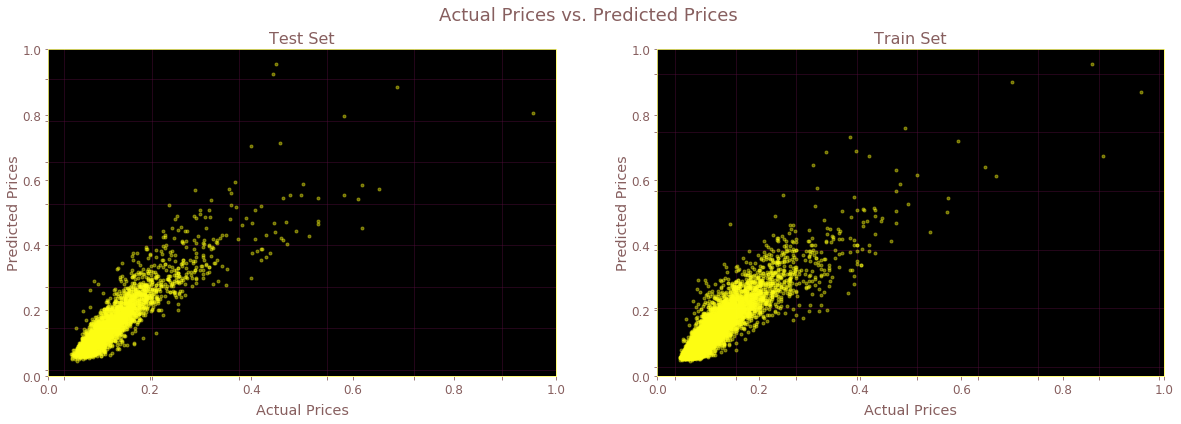

In [68]:
# visualize the differences between actual values and predicted values in TEST & TRAIN data
plot_predictions_vs_actual(y_test, y_hat_test, y_train,y_hat_train)

#### Model_2

In [69]:
X = model_2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print('TRAIN, TEST sizes:',len(X_train), len(X_test), len(y_train), len(y_test),'\n')

model = LinearRegression()
model.fit(X_train, y_train)

y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

print('Estimated R²:',
      model.score(X_train,y_train), '\n')

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse,'\n')

rmse_train = np.sqrt(train_mse)
rmse_test = np.sqrt(test_mse)
print("\nRMSE Train Set:", rmse_train)
print("RMSE Test Set:", rmse_test)

print('\nStandard Deviation of Target Variable, price:', df.price.std())

TRAIN, TEST sizes: 17277 4320 17277 4320 

Estimated R²: 0.8307315907119699 

Train Mean Squarred Error: 22182070532.815216
Test Mean Squarred Error: 23686469568.681255 


RMSE Train Set: 148936.4647519714
RMSE Test Set: 153904.09211155257

Standard Deviation of Target Variable, price: 367368.1401013945


#### model_2 predictions visual

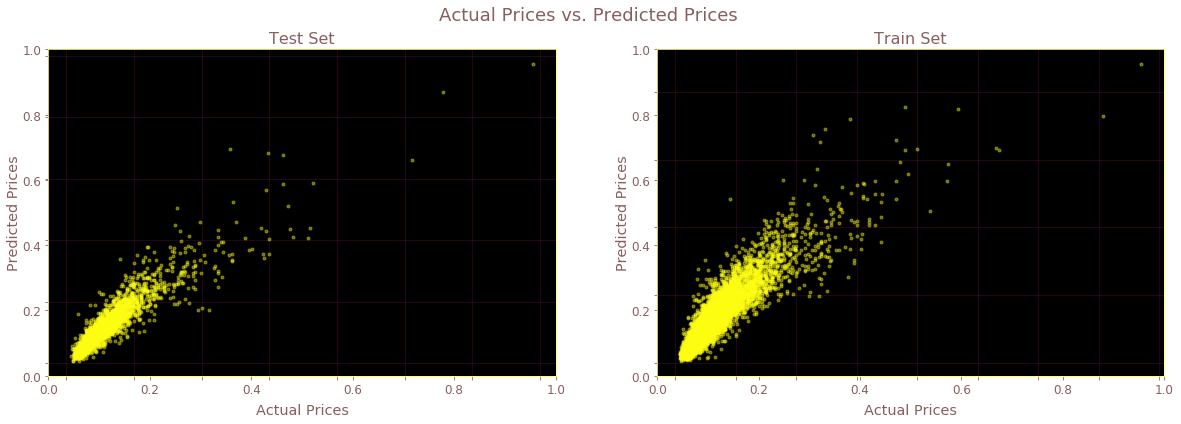

In [70]:
plot_predictions_vs_actual(y_test, y_hat_test, y_train,y_hat_train)

From the scatter plots, we can see model 2 has slightly more linearity to it.  Its test scores are all better than model1 as well.  RMSE indicates the models level of absolute fit to the data. Lower values indicate a better fit.  It can be interpretted as the square root of the unexplained variance of the model. Being inthe same units as the target variable, it makes comparing values easier.  RMSE for these is less than the standard deviation of the target variable. Being that the test errors for both models are not significantly worse than the training errors, I can determine that both models have a decent goodness of fit.  They seem to be geneeralizing and are not over fit or underfit.  Because they both seem like generalized, well fit models, I will choose model_2.  It may be slightly less interpretable than model 1 due to it have extra features, but most of them are simply dummy variables of categorical features that were in both models. There are also more features that will allow for interpretability such as condition, floors, sqft_basement and certain month columns. For this reason, I will pick the model that offers more variablility in predictors as this should allow for relating to clients, ways of improving sales prices.

## Cross Validation
- Perform k-fold cross validation on our chosen model using sklearns cross_val_score to ensure our model fit is generalized.  And to safe guard from possible weaknesses of the train/test split.

In [71]:
# performing 5 fold Cross Validation on the final model
X = model_2
y = df_dum['price']

final_model = LinearRegression()
final_model.fit(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
model = LinearRegression()
model.fit(X_train, y_train)

scores1 = cross_val_score(model, X, y, cv=5, scoring='r2')
scores2 = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated R² scores:", scores1)
print("\nCross-validated neg. MSE's:", scores2)

Cross-validated R² scores: [0.81369758 0.83079085 0.8339557  0.8340983  0.83652657]

Cross-validated neg. MSE's: [-2.82428253e+10 -2.37568334e+10 -1.94294752e+10 -2.10899047e+10
 -2.24872775e+10]


In [72]:
# 10 Fold Cross Validation
scores1 = cross_val_score(model, X, y, cv=10, scoring='r2')
print("Cross-validated R² scores:")
print(scores1,'\n\n')

scores2 = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
print("Cross-validated neg. MSE's:")
print(scores2)

Cross-validated R² scores:
[0.80597695 0.82437018 0.81571117 0.83128888 0.83459497 0.83460107
 0.8196531  0.85007054 0.83722427 0.83386939] 


Cross-validated neg. MSE's:
[-2.80745585e+10 -2.78252484e+10 -2.14300666e+10 -2.77535545e+10
 -1.82064146e+10 -2.04832729e+10 -2.21375164e+10 -1.97167506e+10
 -2.19917881e+10 -2.30691249e+10]


#### Checking residuals to gauge test performance
- I will check for heteroskedastiscity as Ordinary Least Squares regression gives equal weight to all features. Features with higher variance or error terms, will be weighterd the same as others with homosckedasticity, and will negatively effecet the results.

In [73]:
y_pred_train = final_model.predict(X_train)
y_pred_test = final_model.predict(X_test)

train_residuals = y_pred_train - y_train
test_residuals = y_pred_test  - y_test

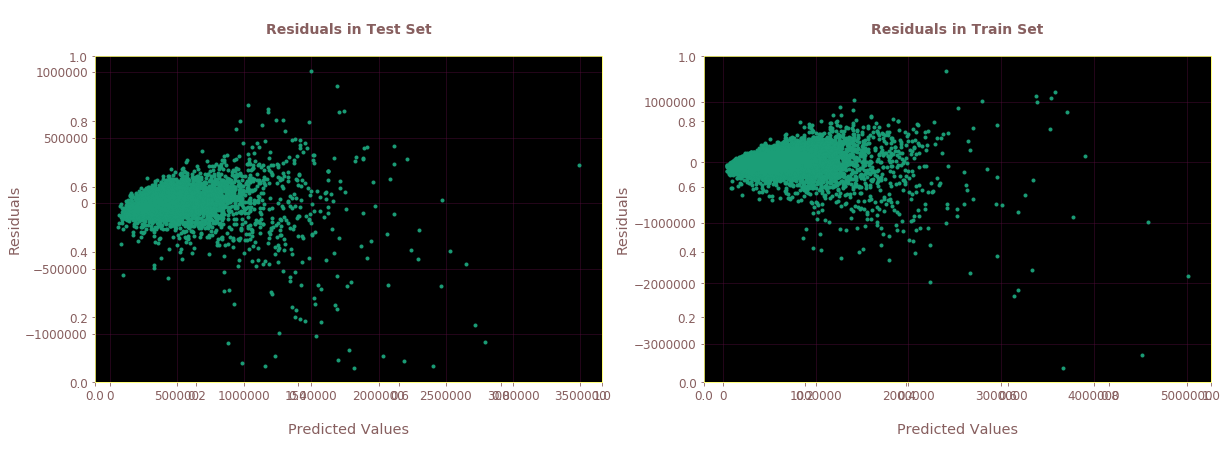

In [74]:
fig, ax = plt.subplots(1,2, figsize=(20, 6))

ax1 = fig.add_subplot(121)
ax1.scatter(x=y_pred_test, y=test_residuals, marker='.')
ax1.set_title('\nResiduals in Test Set\n', size=14, weight='bold')
ax1.set_xlabel('\nPredicted Values\n')
ax1.set_ylabel('Residuals')

ax2 = fig.add_subplot(122)
ax2.scatter(x=y_pred_train, y=train_residuals,  marker='.')
ax2.set_title('\nResiduals in Train Set\n', size=14, weight='bold')
ax2.set_xlabel('\nPredicted Values\n')
ax2.set_ylabel('Residuals')
plt.show()

From the cone shaped spread of the reisduals in both train and test sets, we can see there is heteroskedasticty. This means, that our model is breaking one of the assumptions of OLS.  The model could be further tweaked and normalized to do get rid of this.  That would give a more accurate model. Seeing this makes it hard to determine if our R² values and RMSE values are reliable, given that this assumption has been broken.

## Final model stats

In [75]:
X = scaler.fit_transform(model_2)
X = pd.DataFrame(X,columns=model_2.columns)
Y = Y
X = sm.add_constant(X)
stats_model = sm.OLS(Y, X).fit()
preds = stats_model.predict(X)
stats_model.summary()

/Users/michaelmoravetz/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     1384.
Date:                Sat, 20 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:30:28   Log-Likelihood:            -2.8802e+05
No. Observations:               21597   AIC:                         5.762e+05
Df Residuals:                   21518   BIC:                         5.768e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.398e+05   8379.952     28.612      0.000    2.23e+05    2.56e+05
grade_11            2.003e+05   8971.384     22.331      0.000    1.83e+05    2.18e+05
zipcode_98004       7.625e+05   9032.694     84.414      0.000    7.45e+05     7.8e+05
waterfront_1.0      6.686e+05   1.36e+04     49.137      0.000    6.42e+05    6.95e+05
grade_12            6.189e+05   1.72e+04     36.084      0.000    5.85e+05    6.53e+05
grade_13            1.716e+06   4.29e+04     39.998      0.000    1.63e+06     1.8e+06
grade_9            -1.253e+05   5579.168    -22.454      0.000   -1.36e+05   -1.14e+05
bedrooms           -3.391e+05   4.59e+04     -7.389      0.000   -4.29e+05   -2.49e+05
sqft_living         2.396e+06   3.32e+04     72.074      0.000    2.33e+06    2.46e+06
zipcode_98112       6.378e+05   9711.696     65.670      0.000    6.19e+05    6.57e+05
zipcode_98039       1.226e+06   2.17e+04     56.601      0.000    1.18e+06    1.27e+06
view                2.238e+05   6327.495     35.369      0.000    2.11e+05    2.36e+05
zipcode_98040       5.037e+05   9590.996     52.514      0.000    4.85e+05    5.22e+05
zipcode_98105       4.826e+05   1.04e+04     46.621      0.000    4.62e+05    5.03e+05
zipcode_98033       3.551e+05   7770.162     45.699      0.000     3.4e+05     3.7e+05
zipcode_98119       4.945e+05   1.15e+04     42.938      0.000    4.72e+05    5.17e+05
zipcode_98103       3.425e+05   6871.360     49.845      0.000    3.29e+05    3.56e+05
zipcode_98115       3.354e+05   6846.940     48.988      0.000    3.22e+05    3.49e+05
zipcode_98199       3.857e+05   8985.420     42.925      0.000    3.68e+05    4.03e+05
zipcode_98117       3.165e+05   7006.455     45.178      0.000    3.03e+05     3.3e+05
zipcode_98109        5.07e+05   1.47e+04     34.459      0.000    4.78e+05    5.36e+05
zipcode_98122       3.504e+05   9351.011     37.470      0.000    3.32e+05    3.69e+05
zipcode_98102       4.954e+05   1.51e+04     32.753      0.000    4.66e+05    5.25e+05
zipcode_98107       3.461e+05   9748.437     35.501      0.000    3.27e+05    3.65e+05
zipcode_98023      -3.325e+04   7275.976     -4.569      0.000   -4.75e+04    -1.9e+04
zipcode_98006       2.427e+05   7491.030     32.404      0.000    2.28e+05    2.57e+05
zipcode_98116       2.911e+05   8797.730     33.091      0.000    2.74e+05    3.08e+05
zipcode_98052       2.376e+05   6928.016     34.292      0.000    2.24e+05    2.51e+05
zipcode_98144       2.727e+05   8652.770     31.519      0.000    2.56e+05     2.9e+05
zipcode_98005       3.076e+05    1.2e+04     25.557      0.000    2.84e+05    3.31e+05
zipcode_98008       2.554e+05   9377.461     27.233      0.000    2.37e+05    2.74e+05
zipcode_98092      -3.068e+04   8501.009     -3.609      0.000   -4.73e+04    -1.4e+04
sqft_basement      -2.322e+05    1.6e+

#### Features ranked by coefficients

In [76]:
X = scaler.fit_transform(model_2)
final_model_coef = LinearRegression()
final_model_coef.fit(X, y)
feature_coefs = pd.DataFrame(list(zip(model2, final_model.coef_)),
                             columns=['Feature', 'Coefficient'])

coefs_df = feature_coefs.sort_values(by='Coefficient', ascending=False)
coefs_df[:34], coefs_df[34:]

/Users/michaelmoravetz/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


(           Feature   Coefficient
 4         grade_13  1.716140e+06
 9    zipcode_98039  1.226496e+06
 1    zipcode_98004  7.624851e+05
 2   waterfront_1.0  6.685839e+05
 8    zipcode_98112  6.377702e+05
 3         grade_12  6.188929e+05
 19   zipcode_98109  5.070267e+05
 11   zipcode_98040  5.036626e+05
 21   zipcode_98102  4.953776e+05
 14   zipcode_98119  4.944774e+05
 12   zipcode_98105  4.826100e+05
 17   zipcode_98199  3.856972e+05
 13   zipcode_98033  3.550909e+05
 20   zipcode_98122  3.503790e+05
 22   zipcode_98107  3.460802e+05
 15   zipcode_98103  3.425002e+05
 16   zipcode_98115  3.354205e+05
 18   zipcode_98117  3.165393e+05
 28   zipcode_98005  3.075551e+05
 25   zipcode_98116  2.911282e+05
 27   zipcode_98144  2.727269e+05
 29   zipcode_98008  2.553777e+05
 36   zipcode_98007  2.475115e+05
 33   zipcode_98136  2.464032e+05
 24   zipcode_98006  2.427406e+05
 26   zipcode_98052  2.375748e+05
 35   zipcode_98029  2.203066e+05
 40   zipcode_98177  2.148043e+05
 39   zipcode_

## Interpretting The Model

Based on the ranking of coefficients, the model tells us that there are a few key features that can be used to predict house prices in King County.  Size of the house(sqft_living) is ranked as the number one predictor. The following is a list of features in order of importance to least importance. Note, that because many are categorical, only certain levels of those categories took precendent over the features below it in ranking(ie. there were many zipcode columns interspersed and some were more important than others). 

- sqft_living
- grade
- zipcode
- waterfront
- view
- renovated
- condition
- month
- floors
- sqft_basement
- bedrooms

Size and grade are very important features, but it could be said that location is one of the biggest factors that will predict house pricing based on this model.  

##### How good is this model?
This model has high p-values for all of the predictors, which would say there is relevance, however, due to the current state of the residuals having so much variance, it would not be accurate to say this model is 80% + accurate as one might hope based on R² values alone. Although an R² of of 83% is still a good sign that the predictors in this model will still explain that much of the variance in house prices collectively. While this model could still be improved by normalizing the distributions of the predictors and possibly going back to a model with fewer predictors. This model will still predict house prices better than random or possibly even heavily informed guesses.